In [ ]:
# Importing relevant libraries
from Kanha_Batra import *

In [ ]:
df_full = pd.read_csv('Full_Dataset.csv')
df_toilets = pd.read_csv('public_restrooms_sf.csv')
df_complete = pd.read_csv('Complete_Geocoded_Homeless_Police_Reports.csv')

### Histogram of Instances of Homeless Presence along with locations of Public Restrooms

In [ ]:
plothist_rest(df_full, df_toilets, False)

### Plot of Colorbar

In [ ]:
create_colorbar(df_toilets, False)

In [ ]:
#Import relevant libraries and functions
from Tanish_Jain import *

In [ ]:
#Load the datasets
project_data = pd.read_csv('Full Dataset.csv')
toilet_data = pd.read_csv('public_restrooms_sf.csv')
crime_data = pd.read_csv('Police Dataset2.csv')

In [ ]:
homeless_reports = project_data.groupby('Zip')['Latitude'].count().to_frame()
toilet_data = toilet_data.groupby('zip')['location'].count().to_frame()

num_toilets = []

for zipcode in list(homeless_reports.index):   
    try:
        num_toilets.append(toilet_data.loc[int(zipcode)][0])
    except:
        num_toilets.append(0)

homeless_reports = homeless_reports.rename(columns={'Latitude':'Incident Count'})
homeless_reports.insert(len(homeless_reports.columns), "Toilet Count", num_toilets, True)

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(homeless_reports)

In [ ]:
other_reports = project_data[project_data['Description'] != 'Human or Animal Waste']
poop_reports = project_data[project_data['Description'] == 'Human or Animal Waste']

other_reports = other_reports.groupby('Zip').count()
poop_reports = poop_reports.groupby('Zip').count()
other_reports.insert(0, "Waste Reports", poop_reports.Category, True)
all_reports = other_reports[['Waste Reports','Date']]
all_reports = all_reports.rename(columns={'Date':'Homeless Reports'})

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(all_reports)

In [ ]:
#Split the dataset by the category of report (variable) (occurence by zip code)
cat0 = project_data[project_data['Description'] == 'Human or Animal Waste'].groupby('Zip').count()
cat1 = project_data[project_data['Description'] == 'CIVIL SIDEWALKS, CITATION'].groupby('Zip').count()
cat2 = project_data[project_data['Description'] == 'Encampment Reports'].groupby('Zip').count()
cat3 = project_data[project_data['Description'] == 'Encampment items'].groupby('Zip').count()
cat4 = project_data[project_data['Description'] == 'Individual Concerns'].groupby('Zip').count()
cat5 = project_data[project_data['Description'] == 'LODGING WITHOUT PERMISSION'].groupby('Zip').count()
cat6 = project_data[project_data['Description'] == 'Loitering'].groupby('Zip').count()
cat7 = project_data[project_data['Description'] == 'OBSTRUCTING HEALTH FACILITY, PLACE OF WORSHIP, OR SCHOOL'].groupby('Zip').count()
cat8 = project_data[project_data['Description'] == 'Other'].groupby('Zip').count()

#Create dataset with each variable (occurence by zip code)
cat8.insert(0, 'Waste Reports', cat0.Category, True)
cat8.insert(0, 'Civil Sidewalks Citation', cat1.Category, True)
cat8.insert(0, 'Encampment Reports', cat2.Category, True)
cat8.insert(0, 'Encampment items', cat3.Category, True)
cat8.insert(0, 'Individual Concerns', cat4.Category, True)
cat8.insert(0, 'Lodging without Permission', cat5.Category, True)
cat8.insert(0, 'Loitering', cat6.Category, True)
cat8.insert(0, 'Obstruction', cat7.Category, True)
cat8 = cat8.rename(columns={'Category':'Other'})
all_reports = cat8[['Waste Reports','Civil Sidewalks Citation','Encampment Reports','Encampment items','Individual Concerns','Lodging without Permission','Loitering','Obstruction','Other']]

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(all_reports, 5)


In [ ]:
crime_reports = crime_data.groupby('Zip').count()
homeless_reports = project_data.groupby('Zip').count()
crime_reports = crime_reports.rename(columns={'Category':'Crime Reports'})
crime_reports.insert(0, 'Homeless Reports', homeless_reports.Category, True)
crime_reports = crime_reports[['Homeless Reports','Crime Reports']]

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(crime_reports)


In [ ]:
#Data
years = range(2005,2020,2)
population = [5404, 5703, 5823, 5669, 7008, 6775, 6858, 8011]

x = np.arange(len(years))   #labels for x axis
width = 0.8                 #width of the bars
fig, ax = plt.subplots(facecolor='black', figsize=(5,10))
rects1 = ax.bar(x - width / 2, population, width, color='#37C9EF', alpha=.8)
print(type(rects1))
ax.set_ylabel('Homeless Count', size=30)
ax.set_xlabel('Years', size=30)
ax.set_xticks(x)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', labelcolor='white')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_facecolor('black')

autolabel(rects1, ax)

In [1]:
from Bryce_Smith import *

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [ ]:
# file 1
homeless_data_cleaner("Police_Department_Incident_Reports__2018_to_Present.csv",
                      ['Incident Date', 'Incident Description','Incident Subcategory', 'point'],
                      ['Lodging Without Permission', 'Civil Sidewalks, Citation', 'Civil Sidewalks, Warning'
                          ,'Loitering', 'Obstructing Health Facility, Place of Worship, or School',
                       'Civil Sidewalks, Violation', 'Lodging in Park', 'Civil Sidewalks, Booking'],
                      keep_other_data=True)

# file 2
# columns in this file are uppercase:
colum = ['Lodging Without Permission', 'Civil Sidewalks, Citation', 'Civil Sidewalks, Warning'
                          ,'Loitering', 'Obstructing Health Facility, Place of Worship, or School',
                       'Civil Sidewalks, Violation', 'Lodging in Park', 'Civil Sidewalks, Booking']
for i in range(len(colum)): colum[i] = colum[i].upper()
homeless_data_cleaner("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv",
                      ['Date', 'Category', 'Descript', 'Location'], colum,
                      keep_other_data=True)

# file 3
homeless_data_cleaner('311_Cases.csv', ['Opened','Category', 'Request Type', 'Point'],
                      ['Encampments', 'Human or Animal Waste', 'Homeless Concerns'])

In [ ]:
######################################## Files to Combine #########################################################
# combine all files in the list
all_homeless_filenames = ['Geocoded_Cleaned_311_Cases.csv',
                          'Geocoded_Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv',
                          'Geocoded_Cleaned_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv']
not_homeless_police_reports = ['Geocoded_Cleaned_Not_Homeless_Police_Department_Incident_Reports__2018_to_Present.csv',
                          'Geocoded_Cleaned_Not_Homeless_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv']
homeless_police_reports = ['Geocoded_Cleaned_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv',
                           'Geocoded_Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv']

# file_combiner(homeless_police_reports, 'Complete_Geocoded_Homeless_Police_Reports.csv')
# file_combiner(not_homeless_police_reports, 'Complete_Geocoded_Non_homeless_Police_reports.csv')
# file_combiner(all_homeless_filenames, 'Complete_Geocoded_Homeless_Related_Data.csv')


############################# Add Latitude Longitude and Zipcodes ################################################
# add zip codes, latitude, and longitude
# add_ll('Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv')
# add_ll('Cleaned_Not_Homeless_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
# add_ll('Cleaned_311_Cases.csv')


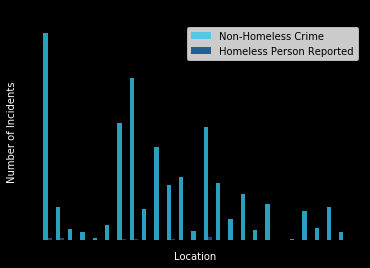

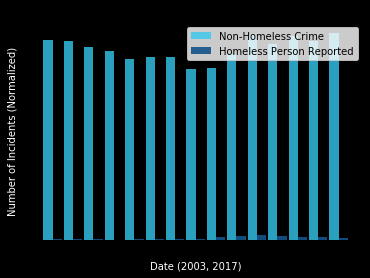

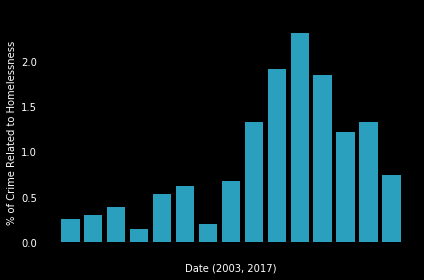

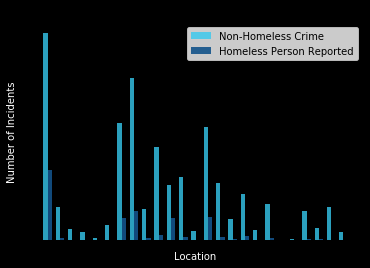

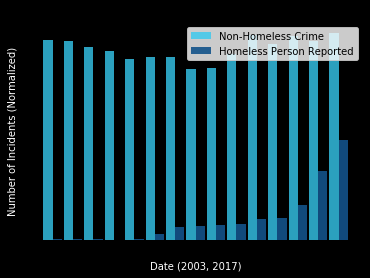

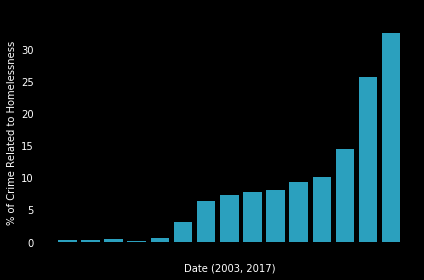

In [2]:

######################### Function Caller ########################################
# Get the % of all crime that is homeless related
bar_plot(['Complete_Geocoded_Non_homeless_Police_reports.csv',
          'Complete_Geocoded_Homeless_Police_Reports.csv'], ['Date', 'Zip'])

# Get the side by side bar graphs of Homeless reports 
bar_plot(['Complete_Geocoded_Non_homeless_Police_reports.csv',
          'Complete_Geocoded_Homeless_Related_Data.csv'], ['Date', 'Zip'])